In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%bash

cd /content/
mkdir data/
cd data/

wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/Questions_Train_mscoco.zip
wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/Questions_Val_mscoco.zip
unzip Questions_Train_mscoco.zip
unzip Questions_Val_mscoco.zip
rm Questions_Train_mscoco.zip
rm Questions_Val_mscoco.zip
rm MultipleChoice*.json

wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/Annotations_Train_mscoco.zip
wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/Annotations_Val_mscoco.zip
unzip Annotations_Train_mscoco.zip
unzip Annotations_Val_mscoco.zip
rm Annotations_Train_mscoco.zip
rm Annotations_Val_mscoco.zip


Archive:  Questions_Train_mscoco.zip
  inflating: OpenEnded_mscoco_train2014_questions.json  
  inflating: MultipleChoice_mscoco_train2014_questions.json  
Archive:  Questions_Val_mscoco.zip
  inflating: OpenEnded_mscoco_val2014_questions.json  
  inflating: MultipleChoice_mscoco_val2014_questions.json  
Archive:  Annotations_Train_mscoco.zip
  inflating: mscoco_train2014_annotations.json  
Archive:  Annotations_Val_mscoco.zip
  inflating: mscoco_val2014_annotations.json  


--2022-04-25 09:24:19--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/Questions_Train_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.175.40
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.175.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21985607 (21M) [application/zip]
Saving to: ‘Questions_Train_mscoco.zip’

     0K .......... .......... .......... .......... ..........  0% 14.4M 1s
    50K .......... .......... .......... .......... ..........  0% 28.0M 1s
   100K .......... .......... .......... .......... ..........  0% 27.7M 1s
   150K .......... .......... .......... .......... ..........  0% 26.5M 1s
   200K .......... .......... .......... .......... ..........  1% 28.1M 1s
   250K .......... .......... .......... .......... ..........  1% 23.7M 1s
   300K .......... .......... .......... .......... ..........  1% 27.7M 1s
   350K .......... .......... .......... .......... ..........  1% 21.1M 1s
   400K .......... 

In [ ]:
%%bash

cp /content/drive/MyDrive/spring22/16824/hw4/train2014.zip /content/data/
cp /content/drive/MyDrive/spring22/16824/hw4/val2014.zip /content/data/

cd /content/data/
unzip train2014.zip
unzip val2014.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!pip install -r /content/drive/MyDrive/spring22/16824/hw4/requirements.txt

     |████████████████████████████████| 1.8 MB 33.5 MB/s 
     |████████████████████████████████| 144 kB 68.2 MB/s 
     |████████████████████████████████| 181 kB 65.1 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=7ecfdd34e6cd33f9ff1076441175cb0222e4fbb54f36cb0902b52c44761455d5
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
%cd /content/drive/MyDrive/spring22/16824/hw4

/content/drive/MyDrive/spring22/16824/hw4


In [ ]:
data_dir = '/content/data/'

annotation_json_file_path = data_dir + 'mscoco_train2014_annotations.json' 
question_json_file_path = data_dir + 'OpenEnded_mscoco_train2014_questions.json'

In [ ]:
from external.vqa.vqa import VQA

vqa = VQA(annotation_json_file_path, question_json_file_path)

loading VQA annotations and questions into memory...
0:00:04.819404
creating index...
index created!


In [ ]:
# 1.1 - Member function to get all question ids
qids = vqa.getQuesIds()

print('1.1', 'getQuesIds()')
print('1.2', len(qids))

1.1 getQuesIds()
1.2 248349


1.3 Question Content, Image associated {'question': 'Does this guy appear homeless?', 'image_id': 291797, 'question_id': 2917970}


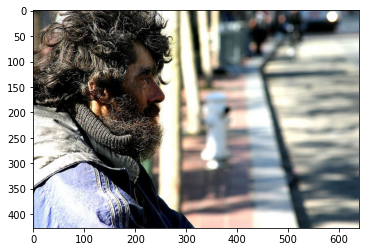

[{'question_type': 'does this', 'multiple_choice_answer': 'yes', 'answers': [{'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 1}, {'answer': 'unkempt', 'answer_confidence': 'yes', 'answer_id': 2}, {'answer': 'yes', 'answer_confidence': 'maybe', 'answer_id': 3}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 4}, {'answer': 'yes', 'answer_confidence': 'maybe', 'answer_id': 5}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 6}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 7}, {'answer': 'yes', 'answer_confidence': 'maybe', 'answer_id': 8}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 9}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 10}], 'image_id': 291797, 'answer_type': 'yes/no', 'question_id': 2917970}]
Question: Does this guy appear homeless?
Answer 1: yes
Answer 2: unkempt
Answer 3: yes
Answer 4: yes
Answer 5: yes
Answer 6: yes
Answer 7: yes
Answer 8: yes
Answer 9: yes
Answer 10: yes
None


In [ ]:
# import cv2
import matplotlib.pyplot as plt

qid = 2917970

print('1.3', 'Question Content, Image associated', vqa.qqa[qid])

img_id = vqa.qqa[qid]['image_id']
n = 12
padded_id = '0'*(n - len(str(img_id))) + str(img_id)
img = plt.imread(data_dir + f'train2014/COCO_train2014_{padded_id}.jpg')

plt.imshow(img)
plt.show()

print(vqa.loadQA([qid]))
print(vqa.showQA(vqa.loadQA([qid])))

In [ ]:
# API key - 0e4b5b28ae5687ac6c1f44fe14569659b5f1547a

In [ ]:
!python main.py

Streaming output truncated to the last 5000 lines.
Epoch: 4, Batch 3302/3312 has loss 2.1929616928100586
Epoch: 5, Batch 0/3312 has loss 3.102081060409546
Epoch: 5, Batch 10/3312 has loss 1.889738917350769
Epoch: 5, Batch 20/3312 has loss 1.9504740238189697
Epoch: 5, Batch 30/3312 has loss 2.590172052383423
Epoch: 5, Batch 40/3312 has loss 2.666776180267334
Epoch: 5, Batch 50/3312 has loss 1.882059931755066
Epoch: 5, Batch 60/3312 has loss 2.387890338897705
Epoch: 5, Batch 70/3312 has loss 1.9443750381469727
Epoch: 5, Batch 80/3312 has loss 2.515308141708374
Epoch: 5, Batch 90/3312 has loss 2.2524631023406982
Epoch: 5, Batch 100/3312 has loss 2.517343044281006
Epoch: 5, Batch 110/3312 has loss 2.537177562713623
Epoch: 5, Batch 120/3312 has loss 2.1183021068573
Epoch: 5, Batch 130/3312 has loss 2.4124326705932617
Epoch: 5, Batch 140/3312 has loss 2.9929628372192383
Epoch: 5, Batch 150/3312 has loss 2.2256710529327393
Epoch: 5, Batch 160/3312 has loss 2.009993553161621
Epoch: 5, Batch 17

In [ ]:
# Part 3
!python main.py --model coattention --cache_location /content/cache

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
loading VQA annotations and questions into memory...
0:00:05.075310
creating index...
index created!
loading VQA annotations and questions into memory...
0:00:03.012755
creating index...
index created!
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
Train Dataset: 248349
Val Dataset: 121512
wandb: Currently logged in as: punit1396 (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.15
wandb: Run data is saved locally in /content/drive/MyDrive/spring22/16824/hw4/wandb/run-20220425_181403-21fsaddd
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run bumbling-voice-20
wandb: ⭐️ View project at https://wandb.ai/punit1396/vlr-hw4
wandb: 🚀 View

In [ ]:
import torch
from student_code.coattention_experiment_runner import CoattentionNetExperimentRunner


experiment_runner = CoattentionNetExperimentRunner(train_image_dir='/content/data/train2014/',
                                                   train_question_path='/content/data/OpenEnded_mscoco_train2014_questions.json',
                                                   train_annotation_path='/content/data/mscoco_train2014_annotations.json',
                                                   test_image_dir='/content/data/val2014/',
                                                   test_question_path='/content/data/OpenEnded_mscoco_val2014_questions.json',
                                                   test_annotation_path='/content/data/mscoco_val2014_annotations.json',
                                                   batch_size=150,
                                                   num_epochs=1,
                                                   num_data_loader_workers=2,
                                                   cache_location='/content/cache/',
                                                   lr=1.,
                                                   log_validation=False)

experiment_runner._model.load_state_dict(torch.load('checkpoints/best_model.pt'))

experiment_runner.validate()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


loading VQA annotations and questions into memory...
0:00:05.113465
creating index...
index created!
loading VQA annotations and questions into memory...
0:00:01.885308
creating index...
index created!
Train Dataset: 248349
Val Dataset: 121512


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
